In [1]:
##### import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import norm

In [2]:
def correlation_matrix(df, title):       
    sn.heatmap(df, cmap="YlGnBu", annot=True)
    ax.set_title(title, size=14)
    plt.tight_layout()    
    return plt.show()

In [3]:
housing = pd.read_csv("../data/socal2.csv")
housing.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [4]:
housing.shape

(15474, 8)

In [5]:
housing.columns

Index(['image_id', 'street', 'citi', 'n_citi', 'bed', 'bath', 'sqft', 'price'], dtype='object')

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.2+ KB


In [7]:
##### check any missing values in dataset
housing.isnull().sum()

image_id    0
street      0
citi        0
n_citi      0
bed         0
bath        0
sqft        0
price       0
dtype: int64

In [8]:
dataset = housing.copy()

In [9]:
##### remove rows with missing value
dataset = dataset.dropna()
dataset.shape

(15474, 8)

In [10]:
##### change column name
dataset = dataset.rename(columns = {"citi":"city"})
dataset = dataset.rename(columns = {"n_citi":"city_code"})

In [11]:
dataset.describe()

,image_id,city_code,bed,bath,sqft,price
count,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,1.547400e+04
mean,7736.500000,216.597518,3.506398,2.453251,2173.913209,7.031209e+05
std,4467.103368,112.372985,1.034838,0.958742,1025.339617,3.769762e+05
min,0.000000,0.000000,1.000000,0.000000,280.000000,1.950000e+05
25%,3868.250000,119.000000,3.000000,2.000000,1426.000000,4.450000e+05
50%,7736.500000,222.500000,3.000000,2.100000,1951.000000,6.390000e+05
75%,11604.750000,315.000000,4.000000,3.000000,2737.750000,8.349750e+05
max,15473.000000,414.000000,12.000000,36.000000,17667.000000,2.000000e+06


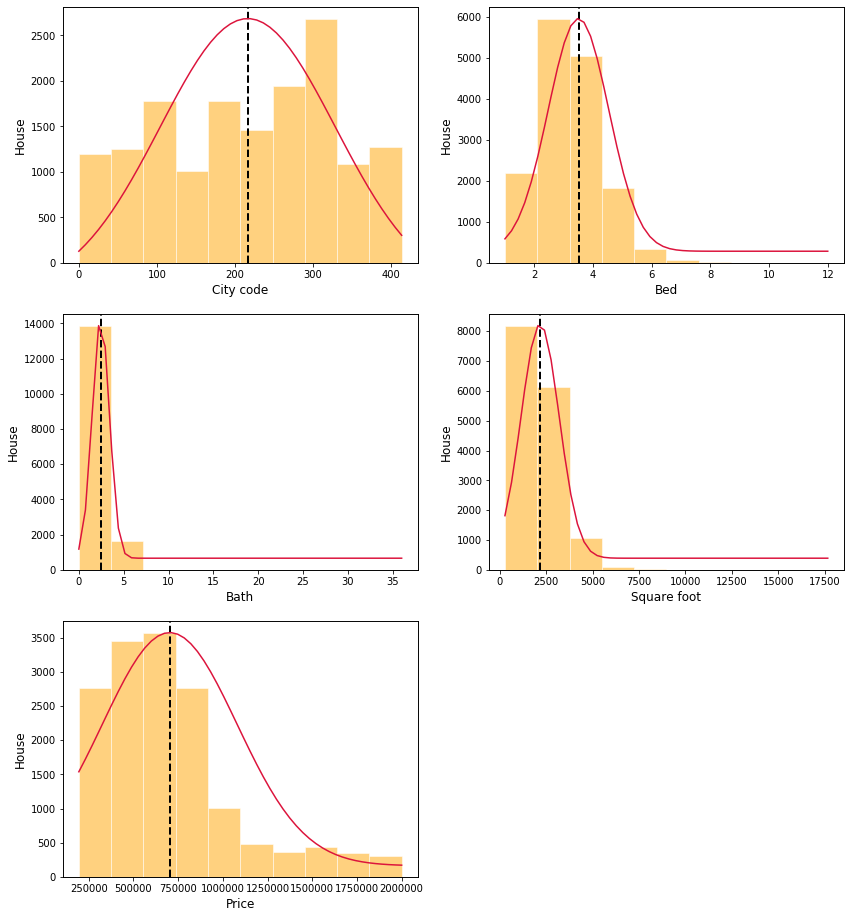

In [12]:
##### plots
fig, axs = plt.subplots(3,2,figsize=(14,16))

### city code
axs[0,0].hist(dataset['city_code'], color='orange', edgecolor="white", alpha=0.5)
axs[0,0].set_xlabel('City code', size=12)
axs[0,0].set_ylabel('House', size=12)
axs[0,0].axvline(dataset['city_code'].mean(), color='black', linewidth=2, linestyle='dashed')

std = np.std(dataset['city_code'], ddof=1)
mean = np.mean(dataset['city_code'])
domain = np.linspace(np.min(dataset['city_code']), np.max(dataset['city_code']))
ax = axs[0,0].twinx()
ax.plot(domain, norm.pdf(domain,mean,std), color='crimson')
ax.axes.yaxis.set_visible(False)


### bed
axs[0,1].hist(dataset['bed'], color='orange', edgecolor="white", alpha=0.5)
axs[0,1].set_xlabel('Bed', size=12)
axs[0,1].set_ylabel('House', size=12)
axs[0,1].axvline(dataset['bed'].mean(), color='black', linewidth=2, linestyle='dashed')

std = np.std(dataset['bed'], ddof=1)
mean = np.mean(dataset['bed'])
domain = np.linspace(np.min(dataset['bed']), np.max(dataset['bed']))
ax = axs[0,1].twinx()
ax.plot(domain, norm.pdf(domain,mean,std), color='crimson')
ax.axes.yaxis.set_visible(False)


### bath
axs[1,0].hist(dataset['bath'], color='orange', edgecolor="white", alpha=0.5)
axs[1,0].set_xlabel('Bath', size=12)
axs[1,0].set_ylabel('House', size=12)
axs[1,0].axvline(dataset['bath'].mean(), color='black', linewidth=2, linestyle='dashed')

std = np.std(dataset['bath'], ddof=1)
mean = np.mean(dataset['bath'])
domain = np.linspace(np.min(dataset['bath']), np.max(dataset['bath']))
ax = axs[1,0].twinx()
ax.plot(domain, norm.pdf(domain,mean,std), color='crimson')
ax.axes.yaxis.set_visible(False)


### square foot
axs[1,1].hist(dataset['sqft'], color='orange', edgecolor="white", alpha=0.5)
axs[1,1].set_xlabel('Square foot', size=12)
axs[1,1].set_ylabel('House', size=12)
axs[1,1].axvline(dataset['sqft'].mean(), color='black', linewidth=2, linestyle='dashed')

std = np.std(dataset['sqft'], ddof=1)
mean = np.mean(dataset['sqft'])
domain = np.linspace(np.min(dataset['sqft']), np.max(dataset['sqft']))
ax = axs[1,1].twinx()
ax.plot(domain, norm.pdf(domain,mean,std), color='crimson')
ax.axes.yaxis.set_visible(False)


### price
axs[2,0].hist(dataset['price'], color='orange', edgecolor="white", alpha=0.5)
axs[2,0].set_xlabel('Price', size=12)
axs[2,0].set_ylabel('House', size=12)
axs[2,0].ticklabel_format(useOffset=False, style='plain')
axs[2,0].axvline(dataset['price'].mean(), color='black', linewidth=2, linestyle='dashed')

std = np.std(dataset['price'], ddof=1)
mean = np.mean(dataset['price'])
domain = np.linspace(np.min(dataset['price']), np.max(dataset['price']))
ax = axs[2,0].twinx()
ax.plot(domain, norm.pdf(domain,mean,std), color='crimson')
ax.axes.yaxis.set_visible(False)

fig.delaxes(ax = axs[2,1]) # delete empty plot

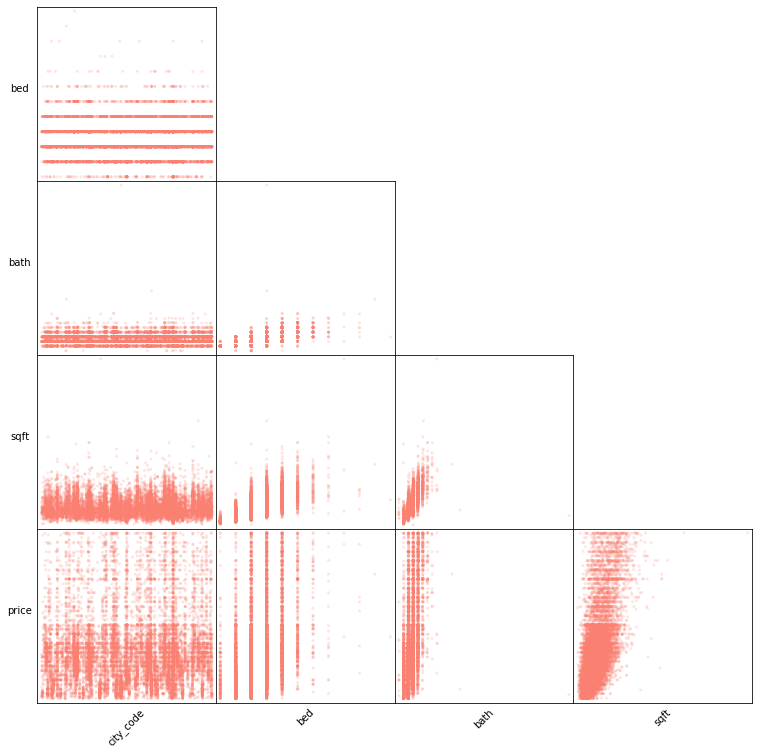

In [13]:
##### scatter plots
axes = pd.plotting.scatter_matrix(dataset.iloc[:,1:], figsize=(16,16), color='salmon', alpha=0.2, diagonal=None)

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i <= j:
            axes[i,j].set_visible(False)

### adjust label rotation
[s.xaxis.label.set_rotation(45) for s in axes.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in axes.reshape(-1)]

### adjust label location
[s.get_yaxis().set_label_coords(-0.1,0.5) for s in axes.reshape(-1)]

### remove ticks
[s.set_xticks(()) for s in axes.reshape(-1)]
[s.set_yticks(()) for s in axes.reshape(-1)]

plt.show()

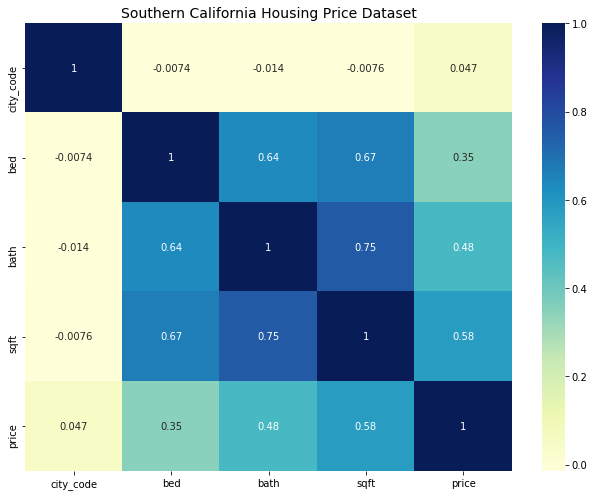

In [14]:
##### correlation matrix
corrMatrix = dataset.iloc[:,1:].corr()
fig, ax = plt.subplots(figsize=(9,7))
correlation_matrix(corrMatrix, title='Southern California Housing Price Dataset')
#fig.savefig('corrmatrix.png')

In [15]:
dataset.to_csv("../data/modified_data.csv", index = False)